In [1]:
import pandas as pd
data=pd.read_csv("FAOLEX_ALL.csv")
print(data.keys())

Index(['Record Id', 'Record URL', 'Document URL', 'Title', 'Original title',
       'Date of original text', 'Last amended date', 'Available website',
       'Language of document', 'Country/Territory', 'Regional organizations',
       'Territorial subdivision', 'Type of text', 'Repealed', 'Abstract',
       'Primary subjects', 'Domain', 'Keywords'],
      dtype='object')


In [2]:
import nltk
keywords=list(data["Keywords"])
country=list(data["Country/Territory"])
i=0
# Split alle keywords op i en liste og ændrer nan til at være en str med Nan
for words in keywords:
    if type(words)!=str:
        #print("type= ",type(words)," Index = ", i)
        words="Nan"
    if type(country[i])!=str:
        country[i]="NaN"
    keywords[i]=words.split(";")
    i+=1



In [3]:
i=0

for words in keywords:
    keywords[i]=words + [" "+country[i]]
    i+=1

In [4]:
# prints keywords for a single text
print(keywords[0])

['maritime zone', ' territorial sea', ' sovereignty', ' Albania']


In [5]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import numpy as np
stemmer = SnowballStemmer("english")
stemmed_words=[]

# Stem keywords
for i in range(len(keywords)):
    stemmed_words.append([stemmer.stem(word) for word in keywords[i]])



In [29]:
print(keywords[14083])
print(stemmed_words[14083])

['marine fisheri', ' mollusc', ' fishing author', ' non-governmental ent', ' fishery management and conserv', ' united kingdom of great britain and northern ireland']


In [7]:
# Find number of extinct domains
a= list(set(data["Repealed"]))
i=0
for words in a:
    if type(words)!=str:
        #print("type= ",type(words)," Index = ", i)
        words="Nan"
    a[i]=words.split(";")

    i+=1



In [8]:
# print different domains
a=sum(a,[])
i=0
for word in a:
        word=word.strip()
        a[i]=word
        i+=1

print(set(a))




{'Y', 'Nan'}


In [9]:
# Count number documents in a language
languages=list(data["Language of document"])
print(languages.count("English"))

54324


In [10]:
# Make a top2vec topic model
from top2vec import Top2Vec
i=0
for word in keywords:
    keywords[i]="".join(word)
    i+=1
model = Top2Vec(keywords,embedding_model="doc2vec")


2023-05-29 10:44:49,083 - top2vec - INFO - Pre-processing documents for training
2023-05-29 10:44:58,104 - top2vec - INFO - Creating joint document/word embedding
2023-05-29 10:49:05,678 - top2vec - INFO - Creating lower dimension embedding of documents
2023-05-29 10:50:37,597 - top2vec - INFO - Finding dense areas of documents
2023-05-29 10:50:46,054 - top2vec - INFO - Finding topics


In [11]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([1041, 1025, 1013, ...,   19,   18,   14], dtype=int64)

In [12]:
topic_words,word_scores,topic_nums = model.get_topics(10)

# Topic words: Ord i en given topic
#Words_score: Hvor 

In [13]:
print(topic_words)

[['plurinational' 'bolivia' 'state' 'smallholders' 'nutrients'
  'prescription' 'peoples' 'peasants' 'adverse' 'indigenous' 'free'
  'fertilizers' 'possession' 'fpic' 'paraguay' 'sovereignty' 'family'
  'port' 'security' 'farming' 'agroecology' 'irrigation' 'ownership'
  'analysis' 'right' 'code' 'camelids' 'common' 'inheritance' 'migratory'
  'prior' 'human' 'improvement' 'afforestation' 'private' 'knowledge'
  'consent' 'corruption' 'sustainable' 'land' 'deceit' 'use'
  'agricultural' 'clearing' 'transfer' 'expropriation' 'tenure' 'seas'
  'uruguay' 'high']
 ['modified' 'genetically' 'organism' 'gmo' 'biosafety' 'biotechnology'
  'biosecurity' 'genetic' 'plant' 'biological' 'variety' 'additives'
  'planting' 'feedstuffs' 'reproduction' 'novel' 'agents' 'feed' 'seeds'
  'breeders' 'material' 'guernsey' 'labelling' 'toxicity' 'poisoning'
  'organic' 'certification' 'packaging' 'intellectual' 'trade'
  'ecological' 'veterinary' 'swine' 'antimicrobial' 'production'
  'steroids' 'animal' 

In [14]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=2, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 111570, Score: 0.9647841453552246
-----------
marine fisheries marine fishes seasons fishing area allocation/quota total allowable catch fishery management and conservation Peru
-----------

Document: 67319, Score: 0.9642285108566284
-----------
marine fisheries marine fishes seasons fishing area allocation/quota total allowable catch fishery management and conservation Peru
-----------

Document: 70434, Score: 0.9639069437980652
-----------
marine fisheries marine fishes seasons fishing area allocation/quota total allowable catch fishery management and conservation Peru
-----------

Document: 66514, Score: 0.9629265666007996
-----------
marine fisheries marine fishes seasons fishing area allocation/quota total allowable catch fishery management and conservation Peru
-----------

Document: 106551, Score: 0.9594933986663818
-----------
marine fisheries marine fishes total allowable catch Argentina
-----------



In [15]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["denmark"], num_topics=3)
print(topic_words)
print(topic_nums)

[array(['allowable', 'total', 'catch', 'greenland', 'fishing',
       'diadromous', 'bycatch', 'seasons', 'fisheries', 'svalbard',
       'mesh', 'method', 'landing', 'fishery', 'transshipment', 'quota',
       'vessel', 'gear', 'mammals', 'fishes', 'allocation', 'crustaceans',
       'hunting', 'cartilaginous', 'norway', 'marine', 'size',
       'migratory', 'methods', 'seas', 'denmark', 'high', 'charge', 'eez',
       'reunion', 'capture', 'fee', 'commercial', 'exclusive', 'port',
       'foreign', 'martinique', 'artisanal', 'mayotte', 'resource',
       'helena', 'economic', 'territorial', 'iceland', 'shelf'],
      dtype='<U15'), array(['hunting', 'bycatch', 'allowable', 'greenland', 'seasons',
       'svalbard', 'mammals', 'total', 'catch', 'methods', 'capture',
       'fee', 'gear', 'diadromous', 'fishing', 'mesh', 'method',
       'fisheries', 'migratory', 'cartilaginous', 'fishes', 'quota',
       'fishery', 'landing', 'transshipment', 'crustaceans', 'birds',
       'turtles', 

In [16]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)

In [17]:
print(model.topic_words_reduced)

[['fishing' 'fisheries' 'allowable' 'bycatch' 'total' 'catch' 'method'
  'landing' 'fishes' 'svalbard' 'mesh' 'cartilaginous' 'vessel' 'fishery'
  'transshipment' 'seasons' 'port' 'high' 'seas' 'diadromous' 'gear'
  'size' 'marine' 'charge' 'mammals' 'crustaceans' 'foreign' 'commercial'
  'eez' 'quota' 'illegal' 'artisanal' 'migratory' 'sea' 'allocation'
  'territorial' 'exclusive' 'unreported' 'prohibited' 'iuu' 'unregulated'
  'molluscs' 'shelf' 'turtles' 'economic' 'greenland' 'continental'
  'maritime' 'mariculture' 'stock']
 ['beverages' 'fruits' 'additives' 'treated' 'edible' 'labelling' 'nuts'
  'legumes' 'hygiene' 'vegetables' 'packaging' 'fats' 'maximum' 'oils'
  'alimentarius' 'limit' 'oilseeds' 'meat' 'residue' 'herbs' 'procedures'
  'codex' 'sanitary' 'mrl' 'milk' 'viticulture' 'spices' 'dairy'
  'condiments' 'safety' 'vending' 'toxicity' 'poisoning' 'rice' 'cocoa'
  'coffee' 'tea' 'residues' 'oenological' 'dietary' 'haccp'
  'adulteration' 'uses' 'fraud' 'steroids' 'hormon

In [18]:
model.topic_words_reduced[4]

array(['swine', 'slaughtering', 'equine', 'goats', 'sheep', 'cattle',
       'hormones', 'book', 'meat', 'poultry', 'steroids', 'hygiene',
       'herd', 'feedstuffs', 'diseases', 'rodents', 'animal',
       'reproduction', 'welfare', 'procedures', 'sanitary', 'vaccination',
       'pests', 'additives', 'limit', 'veterinary', 'drugs', 'camelids',
       'dairy', 'milk', 'feed', 'edible', 'toxicity', 'maximum',
       'disinfection', 'aruba', 'poisoning', 'quarantine',
       'disinfestation', 'mercosur', 'animals', 'mrl', 'northern',
       'residues', 'britain', 'treated', 'residue', 'identification',
       'apiculture', 'sericulture'], dtype='<U14')

In [19]:
topic_words,word_scores,topic_nums = model.get_topics(10)
topic_words

array([['plurinational', 'bolivia', 'state', 'smallholders', 'nutrients',
        'prescription', 'peoples', 'peasants', 'adverse', 'indigenous',
        'free', 'fertilizers', 'possession', 'fpic', 'paraguay',
        'sovereignty', 'family', 'port', 'security', 'farming',
        'agroecology', 'irrigation', 'ownership', 'analysis', 'right',
        'code', 'camelids', 'common', 'inheritance', 'migratory',
        'prior', 'human', 'improvement', 'afforestation', 'private',
        'knowledge', 'consent', 'corruption', 'sustainable', 'land',
        'deceit', 'use', 'agricultural', 'clearing', 'transfer',
        'expropriation', 'tenure', 'seas', 'uruguay', 'high'],
       ['modified', 'genetically', 'organism', 'gmo', 'biosafety',
        'biotechnology', 'biosecurity', 'genetic', 'plant', 'biological',
        'variety', 'additives', 'planting', 'feedstuffs', 'reproduction',
        'novel', 'agents', 'feed', 'seeds', 'breeders', 'material',
        'guernsey', 'labelling', 'toxic

In [20]:
# Tæl hvor mange der er repelaed inden for et dato interval
dates=data["Date of original text"]
repealed=data["Repealed"]
antal=0
for i in range(1800,1970):
    c=dates==str(i)
    d=repealed=="Y"
    antal+=sum(c*d)
print(antal)


C:\Users\Jacob pc\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


134


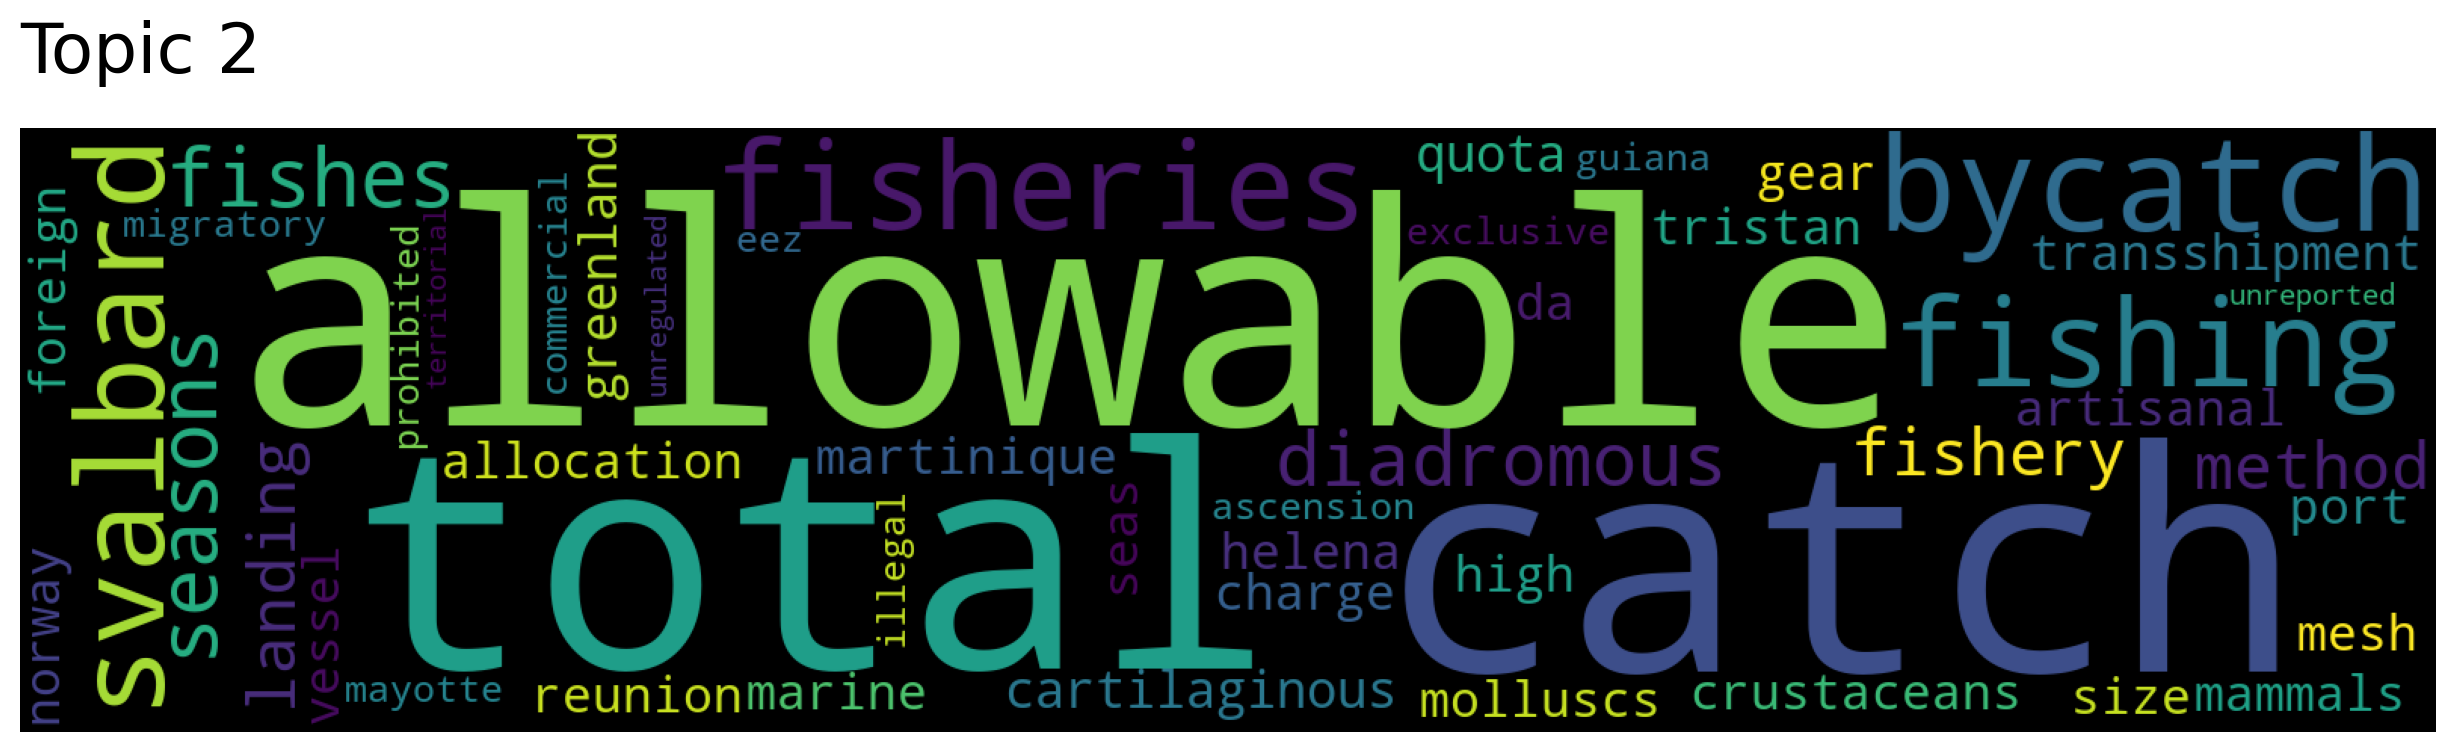

In [21]:
model.generate_topic_wordcloud(2)
# 167 kunne godt være fødevare og børn

In [27]:
from sklearn import preprocessing

topic_words,word_scores,topic_nums = model.get_topics(1000)
co_occurrence_matrix = np.zeros((len(topic_words), len(topic_words)), dtype=int)

for doc_topics in topic_words:
    doc_topic_indices = np.argsort(doc_topics)[::-1]  # Sorted indices of topics for the document
    for i in range(len(doc_topic_indices)):
        for j in range(i + 1, len(doc_topic_indices)):
            topic_i = doc_topic_indices[i]
            topic_j = doc_topic_indices[j]
            co_occurrence_matrix[topic_i, topic_j] += 1
            co_occurrence_matrix[topic_j, topic_i] += 1

# Step 5: Normalize the co-occurrence matrix (optional)
co_occurrence_matrix = preprocessing.normalize(co_occurrence_matrix)  # Implement your normalization function

# Print the co-occurrence matrix
print(co_occurrence_matrix)



KeyboardInterrupt: 

1000
